# 🧠 Web Scraper Leprosy com Sistema de Histórico - Google Colab

## 🎯 Funcionalidades Principais
- ✅ **Sistema de Histórico Inteligente** - Evita reprocessar URLs já coletadas
- ✅ **Busca Incremental** - Coleta apenas URLs novas a cada execução
- ✅ **Múltiplas Fontes** - Google + PubMed + Sites Especializados
- ✅ **Visualização Automática** - Gráficos e estatísticas
- ✅ **Persistência de Dados** - Histórico mantido entre execuções
- ✅ **Execução Ilimitada** - Execute quantas vezes quiser sem repetições

## 🚀 Como Funciona o Sistema de Histórico

### 📚 **Primeira Execução:**
```
📊 Histórico: 0 URLs
🔍 Busca: 80 URLs encontradas
🆕 Processa: 80 URLs (todas novas)
💾 Salva: 80 URLs no histórico
```

### 🔄 **Segunda Execução:**
```
📊 Histórico: 80 URLs
🔍 Busca: 85 URLs encontradas
🆕 Processa: 5 URLs (apenas as novas)
💾 Salva: 85 URLs no histórico
```

### ⚡ **Execuções Seguintes:**
```
📊 Histórico: 85+ URLs
🔍 Busca: Novas URLs disponíveis
🆕 Processa: Apenas URLs inéditas
💾 Salva: Histórico sempre crescente
```

---

## 📦 1. Instalação de Dependências

**Execute esta célula apenas uma vez por sessão**

In [ ]:
# 📦 INSTALAÇÃO DE DEPENDÊNCIAS
!pip install googlesearch-python beautifulsoup4 requests pandas matplotlib seaborn

print("✅ Todas as dependências foram instaladas com sucesso!")
print("🚀 Agora você pode executar as próximas células.")

✅ Todas as dependências foram instaladas com sucesso!
🚀 Agora você pode executar as próximas células.


## 📚 2. Importações e Configurações

**Execute sempre que iniciar uma nova sessão**

In [ ]:
# 📚 IMPORTAÇÕES E CONFIGURAÇÕES
import csv
import time
import requests
from googlesearch import search
from bs4 import BeautifulSoup
import logging
from datetime import datetime
import random
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from urllib.parse import urlparse
import re
from IPython.display import display, HTML, clear_output
import warnings
warnings.filterwarnings('ignore')

# Configurar logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

print("📚 Bibliotecas importadas com sucesso!")
print(f"⏰ Sessão iniciada em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("🧠 Sistema de Histórico Inteligente ativo!")

📚 Bibliotecas importadas com sucesso!
⏰ Sessão iniciada em: 2025-09-04 22:11:00
🧠 Sistema de Histórico Inteligente ativo!


## 🤖 3. Classe Principal com Sistema de Histórico

**Execute sempre que iniciar uma nova sessão**

In [ ]:
class WebScraperHistoricoColab:
    def __init__(self, arquivo_historico='historico_leprosy_colab.json'):
        self.arquivo_historico = arquivo_historico
        self.urls_processadas = self.carregar_historico()
        self.dados_processados = []
        self.user_agents = [
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
            'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
        ]

        print(f"🧠 SISTEMA DE HISTÓRICO ATIVO")
        print(f"📊 URLs já processadas anteriormente: {len(self.urls_processadas)}")
        if len(self.urls_processadas) > 0:
            print(f"💡 O sistema evitará reprocessar essas {len(self.urls_processadas)} URLs")
        else:
            print(f"🆕 Esta é sua primeira execução - todas as URLs serão novas!")
        print()

    def carregar_historico(self):
        """Carrega histórico de URLs já processadas"""
        if os.path.exists(self.arquivo_historico):
            try:
                with open(self.arquivo_historico, 'r', encoding='utf-8') as f:
                    historico = json.load(f)
                    return set(historico.get('urls_processadas', []))
            except Exception as e:
                print(f"⚠️ Erro ao carregar histórico: {e}")
                return set()
        return set()

    def salvar_historico(self):
        """Salva histórico de URLs processadas"""
        try:
            historico = {
                'urls_processadas': list(self.urls_processadas),
                'ultima_atualizacao': datetime.now().isoformat(),
                'total_urls': len(self.urls_processadas),
                'versao': 'Colab_Historico_v2.0'
            }

            with open(self.arquivo_historico, 'w', encoding='utf-8') as f:
                json.dump(historico, f, ensure_ascii=False, indent=2)

            print(f"💾 Histórico atualizado: {len(self.urls_processadas)} URLs")
        except Exception as e:
            print(f"⚠️ Erro ao salvar histórico: {e}")

    def filtrar_urls_novas(self, urls_encontradas):
        """Filtra apenas URLs que não foram processadas anteriormente"""
        urls_novas = []
        urls_repetidas = []

        for url in urls_encontradas:
            if url not in self.urls_processadas:
                urls_novas.append(url)
            else:
                urls_repetidas.append(url)

        print(f"🔍 FILTRO ANTI-REPETIÇÃO:")
        print(f"   📊 URLs encontradas na busca: {len(urls_encontradas)}")
        print(f"   🆕 URLs novas (serão processadas): {len(urls_novas)}")
        print(f"   🔄 URLs já processadas (ignoradas): {len(urls_repetidas)}")

        if urls_repetidas and len(urls_repetidas) <= 5:
            print(f"   📋 URLs ignoradas (já no histórico):")
            for url in urls_repetidas:
                print(f"      - {url[:60]}...")
        elif urls_repetidas:
            print(f"   📋 Exemplos de URLs ignoradas:")
            for url in urls_repetidas[:3]:
                print(f"      - {url[:60]}...")
            print(f"      ... e mais {len(urls_repetidas)-3} URLs")

        return urls_novas

    def buscar_google_inteligente_incremental(self, max_urls=100):
        """Busca no Google considerando histórico"""
        print("🔍 BUSCA GOOGLE INCREMENTAL")
        print("=" * 40)

        # Queries expandidas para busca mais profunda
        queries = [
            '("mobile app" AND "Leprosy") after:2016',
            '("web application" AND "Hansen\'s Disease") after:2016',
            '("smartphone" AND "Leprosy diagnosis") after:2016',
            '("mHealth" AND "Leprosy") after:2016',
            '("digital health" AND "Hansen\'s Disease") after:2016',
            '("AI" AND "Leprosy detection") after:2016',
            '("machine learning" AND "Leprosy") after:2016',
            '("telemedicine" AND "Hansen\'s Disease") after:2016',
            '("computer vision" AND "Leprosy lesion") after:2016',
            '("neural network" AND "Hansen\'s Disease") after:2016'
        ]

        urls_encontradas = set()

        for i, query in enumerate(queries, 1):
            print(f"\n🔍 Query {i}/{len(queries)}: {query}")

            try:
                urls_desta_query = 0
                max_por_query = max_urls // len(queries)

                for url in search(query, num_results=max_por_query, sleep_interval=random.uniform(3, 6)):
                    if url not in urls_encontradas:
                        urls_encontradas.add(url)
                        urls_desta_query += 1

                    if urls_desta_query % 5 == 0:
                        print(f"   📊 {urls_desta_query} URLs desta query")

                print(f"   ✅ {urls_desta_query} URLs encontradas")

            except Exception as e:
                print(f"   ⚠️ Erro: {e}")
                if "429" in str(e):
                    print("   ⏳ Google bloqueou - aguardando...")
                    time.sleep(30)

            # Pausa entre queries
            if i < len(queries):
                pausa = random.uniform(8, 15)
                print(f"   ⏳ Pausando {pausa:.1f}s...")
                time.sleep(pausa)

        # Filtrar URLs novas
        urls_novas = self.filtrar_urls_novas(list(urls_encontradas))
        return urls_novas

    def buscar_pubmed_expandido(self):
        """Busca expandida no PubMed"""
        print("\n🔬 BUSCA PUBMED EXPANDIDA")
        print("=" * 35)

        termos = [
            "leprosy mobile app",
            "hansen disease mobile application",
            "leprosy smartphone",
            "hansen disease digital health",
            "leprosy mHealth",
            "leprosy artificial intelligence",
            "hansen disease machine learning",
            "leprosy computer vision",
            "hansen disease telemedicine"
        ]

        urls_pubmed = []

        for termo in termos:
            try:
                url_api = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
                params = {
                    'db': 'pubmed',
                    'term': f'{termo} AND ("2016"[Date - Publication] : "3000"[Date - Publication])',
                    'retmax': 25,
                    'retmode': 'json'
                }

                response = requests.get(url_api, params=params, timeout=10)
                if response.status_code == 200:
                    data = response.json()
                    if 'esearchresult' in data and 'idlist' in data['esearchresult']:
                        for pmid in data['esearchresult']['idlist']:
                            url_artigo = f"https://pubmed.ncbi.nlm.nih.gov/{pmid}/"
                            urls_pubmed.append(url_artigo)

                time.sleep(1)

            except Exception as e:
                print(f"   ⚠️ Erro ao buscar '{termo}': {e}")

        urls_unicos = list(set(urls_pubmed))
        urls_novas = self.filtrar_urls_novas(urls_unicos)

        print(f"   ✅ PubMed: {len(urls_novas)} URLs novas")
        return urls_novas

    def buscar_fontes_especializadas_expandidas(self):
        """Busca expandida em fontes especializadas"""
        print("\n🏥 FONTES ESPECIALIZADAS EXPANDIDAS")
        print("=" * 45)

        urls_especializadas = [
            # Organizações Internacionais
            "https://www.who.int/health-topics/leprosy",
            "https://www.who.int/news-room/fact-sheets/detail/leprosy",
            "https://www.cdc.gov/leprosy/about/index.html",

            # Organizações Especializadas
            "https://nlrinternational.org/news/new-version-nlr-skinapp-launched-4-additional-diseases/",
            "https://nlrinternational.org/what-we-do/research-innovation/",
            "https://www.leprosymission.org/what-is-leprosy/",
            "https://www.validate-network.org/pathogens/leprosy",

            # Revistas Científicas
            "https://mhealth.jmir.org/2021/4/e23718",
            "https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1012550",
            "https://link.springer.com/chapter/10.1007/978-3-031-53901-5_6",
            "https://ieeexplore.ieee.org/document/7860891",
            "https://leprosyreview.org/article/93/3/20-22043",

            # Órgãos de Saúde Nacionais
            "https://www.health.state.mn.us/diseases/leprosy/index.html",
            "https://www.health.vic.gov.au/infectious-diseases/leprosy-hansens-disease",
            "https://www.chp.gov.hk/en/healthtopics/content/24/107984.html",

            # Recursos Educacionais
            "https://www.nps.gov/kala/learn/historyculture/hansensdisease.htm",
            "https://rarediseases.org/rare-diseases/leprosy/",
            "https://www.osmosis.org/learn/Leprosy",
            "https://www.drugs.com/cg/hansen-disease-leprosy.html"
        ]

        urls_novas = self.filtrar_urls_novas(urls_especializadas)

        print(f"   ✅ Fontes especializadas: {len(urls_novas)} URLs novas")
        return urls_novas

    def extrair_resumo_completo(self, url, timeout=12):
        """Extrai título e resumo com estratégias robustas"""
        for tentativa in range(2):
            try:
                headers = {
                    'User-Agent': random.choice(self.user_agents),
                    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
                    'Accept-Language': 'en-US,en;q=0.9,pt-BR;q=0.8,pt;q=0.7'
                }

                response = requests.get(url, headers=headers, timeout=timeout)
                response.raise_for_status()

                soup = BeautifulSoup(response.content, 'html.parser')

                # Extrair título
                titulo = self._extrair_titulo(soup)

                # Extrair resumo
                resumo = self._extrair_resumo_multiplas_estrategias(soup)

                return titulo, resumo, "Sucesso"

            except Exception as e:
                if tentativa == 1:
                    return "Erro de acesso", f"Erro: {str(e)[:80]}", "Erro"
                time.sleep(random.uniform(1, 3))

        return "Erro múltiplas tentativas", "Falha após várias tentativas", "Erro"

    def _extrair_titulo(self, soup):
        """Extrai título com múltiplas estratégias"""
        titulo = ""

        # 1. Tag title
        title_tag = soup.find('title')
        if title_tag:
            titulo = title_tag.get_text().strip()

        # 2. H1 como fallback
        if not titulo:
            h1 = soup.find('h1')
            if h1:
                titulo = h1.get_text().strip()

        # 3. Meta title
        if not titulo:
            meta_title = soup.find('meta', attrs={'name': 'title'})
            if meta_title and meta_title.get('content'):
                titulo = meta_title.get('content').strip()

        if not titulo:
            titulo = "Título não encontrado"

        # Limitar tamanho
        if len(titulo) > 180:
            titulo = titulo[:180] + "..."

        return titulo

    def _extrair_resumo_multiplas_estrategias(self, soup):
        """Extrai resumo usando múltiplas estratégias"""
        resumo = ""

        # 1. Meta description
        meta_desc = soup.find('meta', attrs={'name': 'description'})
        if meta_desc and meta_desc.get('content'):
            resumo = meta_desc.get('content').strip()

        # 2. OpenGraph description
        if not resumo:
            og_desc = soup.find('meta', attrs={'property': 'og:description'})
            if og_desc and og_desc.get('content'):
                resumo = og_desc.get('content').strip()

        # 3. Abstract para artigos acadêmicos
        if not resumo:
            abstract = soup.find('div', class_=lambda x: x and 'abstract' in x.lower())
            if abstract:
                paragrafos = abstract.find_all('p')
                if paragrafos:
                    resumo = paragrafos[0].get_text().strip()

        # 4. Primeiros parágrafos substanciais
        if not resumo:
            paragrafos = soup.find_all('p')
            texto_paragrafos = []
            for p in paragrafos[:5]:
                texto = p.get_text().strip()
                if len(texto) > 40:
                    texto_paragrafos.append(texto)
                    if len(" ".join(texto_paragrafos)) > 400:
                        break
            resumo = " ".join(texto_paragrafos)

        # Limitar tamanho
        if len(resumo) > 500:
            resumo = resumo[:500] + "..."

        if not resumo or len(resumo) < 20:
            resumo = "Resumo não disponível"

        return resumo

    def mostrar_historico(self):
        """Mostra informações do histórico"""
        print("📊 INFORMAÇÕES DO HISTÓRICO")
        print("=" * 35)
        print(f"📚 Total de URLs processadas: {len(self.urls_processadas)}")

        if os.path.exists(self.arquivo_historico):
            try:
                with open(self.arquivo_historico, 'r', encoding='utf-8') as f:
                    historico = json.load(f)
                    ultima_atualizacao = historico.get('ultima_atualizacao', 'N/A')
                    if ultima_atualizacao != 'N/A':
                        # Converter para formato legível
                        try:
                            dt = datetime.fromisoformat(ultima_atualizacao.replace('Z', '+00:00'))
                            ultima_atualizacao = dt.strftime('%Y-%m-%d %H:%M:%S')
                        except:
                            pass
                    print(f"🕒 Última atualização: {ultima_atualizacao}")
                    print(f"📝 Versão: {historico.get('versao', 'N/A')}")
            except:
                pass

        if len(self.urls_processadas) > 0:
            print("\n📋 Exemplos de URLs no histórico:")
            for i, url in enumerate(list(self.urls_processadas)[:3], 1):
                print(f"   {i}. {url[:55]}...")
            if len(self.urls_processadas) > 3:
                print(f"   ... e mais {len(self.urls_processadas)-3} URLs")

        print("=" * 35)

print("🤖 Classe WebScraperHistoricoColab criada com sucesso!")
print("🧠 Sistema de histórico inteligente ativo!")

🤖 Classe WebScraperHistoricoColab criada com sucesso!
🧠 Sistema de histórico inteligente ativo!


## 🚀 4. Função Principal de Execução

**Esta é a função principal que você executará repetidamente**

In [ ]:
def executar_scraper_incremental_colab(max_urls=120):
    """
    🚀 FUNÇÃO PRINCIPAL - EXECUTE ESTA CÉLULA QUANTAS VEZES QUISER!

    O sistema automaticamente:
    - Carrega o histórico de execuções anteriores
    - Busca URLs em múltiplas fontes
    - Filtra apenas URLs novas (não processadas antes)
    - Processa apenas o que é novo
    - Salva o histórico atualizado
    - Gera visualizações automáticas
    """

    print("🚀 WEB SCRAPER INCREMENTAL - GOOGLE COLAB")
    print("🧠 SISTEMA ANTI-REPETIÇÃO ATIVO")
    print("=" * 55)

    # Criar instância do scraper
    scraper = WebScraperHistoricoColab()

    # Mostrar histórico atual
    scraper.mostrar_historico()

    # Buscar URLs de múltiplas fontes
    print("\n🔍 INICIANDO BUSCA EM MÚLTIPLAS FONTES...")
    print("=" * 50)

    urls_google = scraper.buscar_google_inteligente_incremental(max_urls=max_urls)
    urls_pubmed = scraper.buscar_pubmed_expandido()
    urls_especializadas = scraper.buscar_fontes_especializadas_expandidas()

    # Combinar todas as URLs novas
    todas_urls_novas = list(set(urls_google + urls_pubmed + urls_especializadas))

    print(f"\n📊 RESUMO DA BUSCA INCREMENTAL:")
    print(f"   🔍 Google (novas): {len(urls_google)} URLs")
    print(f"   🔬 PubMed (novas): {len(urls_pubmed)} URLs")
    print(f"   🏥 Especializadas (novas): {len(urls_especializadas)} URLs")
    print(f"   🆕 Total URLs novas: {len(todas_urls_novas)} URLs")

    if not todas_urls_novas:
        print("\n✅ NENHUMA URL NOVA ENCONTRADA!")
        print("🎯 Todas as URLs disponíveis já foram processadas anteriormente.")
        print("💡 Isso significa que o sistema está funcionando perfeitamente!")
        print("🔄 Tente novamente em alguns dias para capturar novos conteúdos.")
        print("📚 Ou execute com parâmetros diferentes para buscar mais profundamente.")

        # Mostrar estatísticas do histórico mesmo sem URLs novas
        if len(scraper.urls_processadas) > 0:
            print(f"\n📊 ESTATÍSTICAS DO SEU HISTÓRICO:")
            print(f"   📚 Total de URLs coletadas: {len(scraper.urls_processadas)}")
            print(f"   🎯 Base de dados construída com sucesso!")

        return None

    # Processar URLs novas
    print(f"\n🔄 PROCESSANDO {len(todas_urls_novas)} URLs NOVAS...")
    print("=" * 50)

    dados = []
    urls_com_sucesso = 0
    urls_com_erro = 0

    for i, url in enumerate(todas_urls_novas, 1):
        print(f"[{i:2d}/{len(todas_urls_novas)}] {url[:55]}...")

        titulo, resumo, status = scraper.extrair_resumo_completo(url)

        # Identificar fonte
        if 'pubmed.ncbi.nlm.nih.gov' in url:
            fonte = 'PubMed'
        elif any(termo in url for termo in ['who.int', 'cdc.gov']):
            fonte = 'Org. Saúde'
        elif any(termo in url for termo in ['nlr', 'leprosy']):
            fonte = 'Especializada'
        elif any(termo in url for termo in ['springer', 'wiley', 'journals', 'plos', 'jmir', 'ieee']):
            fonte = 'Revista'
        else:
            fonte = 'Google'

        dados.append({
            'URL': url,
            'Título': titulo,
            'Resumo': resumo,
            'Status': status,
            'Fonte': fonte,
            'Data_Processamento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            'Execucao': 'Incremental'
        })

        # Adicionar ao histórico
        scraper.urls_processadas.add(url)

        if status == "Sucesso":
            urls_com_sucesso += 1
        else:
            urls_com_erro += 1

        if i % 5 == 0:
            taxa = (urls_com_sucesso / i) * 100
            print(f"    📊 {i}/{len(todas_urls_novas)} | ✅ {urls_com_sucesso} | ❌ {urls_com_erro} | 📈 {taxa:.1f}%")

        time.sleep(random.uniform(1, 2))

    # Salvar histórico atualizado
    scraper.salvar_historico()

    # Criar DataFrame
    df = pd.DataFrame(dados)
    df = df.sort_values('Status', ascending=False)  # Sucessos primeiro

    # Salvar CSV
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    nome_arquivo = f"leprosy_incremental_{timestamp}.csv"
    df.to_csv(nome_arquivo, index=False, encoding='utf-8')

    # Relatório final
    print("\n" + "=" * 50)
    print("🎉 BUSCA INCREMENTAL CONCLUÍDA!")
    print("=" * 50)
    print(f"📁 Arquivo: {nome_arquivo}")
    print(f"🆕 URLs novas processadas: {len(todas_urls_novas)}")
    print(f"✅ Sucessos: {urls_com_sucesso} ({urls_com_sucesso/len(todas_urls_novas)*100:.1f}%)")
    print(f"❌ Erros: {urls_com_erro}")
    print(f"📚 Total no histórico: {len(scraper.urls_processadas)} URLs")
    print(f"🔄 Próxima execução processará apenas URLs novas!")
    print("=" * 50)

    return df, nome_arquivo, scraper

print("🚀 Função principal configurada!")
print("💡 Execute a próxima célula para começar a coleta!")

🚀 Função principal configurada!
💡 Execute a próxima célula para começar a coleta!


## 📊 5. Função de Visualização Automática

**Gera gráficos automáticos após a coleta**

In [ ]:
def criar_visualizacoes_automaticas(df, scraper):
    """
    Cria visualizações automáticas dos dados coletados
    """
    print("📊 GERANDO VISUALIZAÇÕES AUTOMÁTICAS...")

    # Configurar figura
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Análise Incremental - Leprosy/Hansen\'s Disease Research', fontsize=16, fontweight='bold')

    # Gráfico 1: Status das URLs desta execução
    ax1 = axes[0, 0]
    status_counts = df['Status'].value_counts()
    colors = ['#2ecc71', '#e74c3c']
    wedges, texts, autotexts = ax1.pie(status_counts.values, labels=status_counts.index,
                                       autopct='%1.1f%%', colors=colors, startangle=90)
    ax1.set_title('Status - Esta Execução', fontweight='bold')

    # Gráfico 2: Fontes das URLs
    ax2 = axes[0, 1]
    fonte_counts = df['Fonte'].value_counts()
    bars = ax2.bar(range(len(fonte_counts)), fonte_counts.values,
                   color=sns.color_palette("Set2", len(fonte_counts)))
    ax2.set_title('URLs por Fonte', fontweight='bold')
    ax2.set_xlabel('Fontes')
    ax2.set_ylabel('Número de URLs')
    ax2.set_xticks(range(len(fonte_counts)))
    ax2.set_xticklabels(fonte_counts.index, rotation=45, ha='right')

    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom')

    # Gráfico 3: Histórico vs Novos
    ax3 = axes[0, 2]
    historico_size = len(scraper.urls_processadas) - len(df)
    novos_size = len(df)

    bars = ax3.bar(['URLs Históricas', 'URLs Novas'], [historico_size, novos_size],
                   color=['#3498db', '#e74c3c'])
    ax3.set_title('Crescimento da Base de Dados', fontweight='bold')
    ax3.set_ylabel('Número de URLs')

    for i, v in enumerate([historico_size, novos_size]):
        ax3.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

    # Gráfico 4: Domínios mais frequentes
    ax4 = axes[1, 0]
    dominios = []
    for url in df['URL']:
        try:
            domain = urlparse(url).netloc
            if domain.startswith('www.'):
                domain = domain[4:]
            dominios.append(domain)
        except:
            dominios.append('Desconhecido')

    df['Dominio'] = dominios
    dominio_counts = df['Dominio'].value_counts().head(6)

    if len(dominio_counts) > 0:
        bars = ax4.bar(range(len(dominio_counts)), dominio_counts.values,
                       color=sns.color_palette("husl", len(dominio_counts)))
        ax4.set_title('Top 6 Domínios', fontweight='bold')
        ax4.set_xlabel('Domínios')
        ax4.set_ylabel('URLs')
        ax4.set_xticks(range(len(dominio_counts)))
        ax4.set_xticklabels([d[:12] + '...' if len(d) > 12 else d for d in dominio_counts.index],
                            rotation=45, ha='right')

        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{int(height)}', ha='center', va='bottom')

    # Gráfico 5: Distribuição do tamanho dos resumos
    ax5 = axes[1, 1]
    resumos_sucesso = df[df['Status'] == 'Sucesso']['Resumo'].dropna()
    tamanhos_resumo = [len(resumo) for resumo in resumos_sucesso if resumo != 'Resumo não disponível']

    if tamanhos_resumo:
        ax5.hist(tamanhos_resumo, bins=10, color='skyblue', alpha=0.7, edgecolor='black')
        ax5.set_title('Tamanho dos Resumos', fontweight='bold')
        ax5.set_xlabel('Caracteres')
        ax5.set_ylabel('Frequência')
        if len(tamanhos_resumo) > 1:
            ax5.axvline(np.mean(tamanhos_resumo), color='red', linestyle='--',
                       label=f'Média: {np.mean(tamanhos_resumo):.0f}')
            ax5.legend()

    # Gráfico 6: Evolução temporal (simulada)
    ax6 = axes[1, 2]
    sucessos = len(df[df['Status'] == 'Sucesso'])
    erros = len(df[df['Status'] == 'Erro'])

    bars = ax6.bar(['Sucessos', 'Erros'], [sucessos, erros], color=['#2ecc71', '#e74c3c'])
    ax6.set_title('Resultados desta Execução', fontweight='bold')
    ax6.set_ylabel('Número de URLs')

    for i, v in enumerate([sucessos, erros]):
        ax6.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Análise de temas nos resumos
    analisar_temas_automatico(df)

def analisar_temas_automatico(df):
    """Analisa temas nos resumos automaticamente"""
    print("\n🎯 ANÁLISE AUTOMÁTICA DE TEMAS:")

    sucessos = df[df['Status'] == 'Sucesso']

    temas_relevantes = {
        'mobile app': 0,
        'artificial intelligence': 0,
        'machine learning': 0,
        'diagnosis': 0,
        'screening': 0,
        'digital health': 0,
        'mhealth': 0,
        'smartphone': 0,
        'telemedicine': 0,
        'neural network': 0,
        'computer vision': 0,
        'deep learning': 0
    }

    for resumo in sucessos['Resumo']:
        if resumo and resumo != 'Resumo não disponível':
            resumo_lower = resumo.lower()
            for tema in temas_relevantes:
                if tema in resumo_lower:
                    temas_relevantes[tema] += 1

    # Mostrar apenas temas encontrados
    temas_encontrados = {k: v for k, v in temas_relevantes.items() if v > 0}

    if temas_encontrados:
        print("📊 Temas identificados nos resumos:")
        for tema, count in sorted(temas_encontrados.items(), key=lambda x: x[1], reverse=True):
            print(f"   • {tema}: {count} menções")

        # Gráfico de temas
        if len(temas_encontrados) > 1:
            plt.figure(figsize=(12, 6))
            plt.bar(temas_encontrados.keys(), temas_encontrados.values(),
                    color=sns.color_palette("Set3", len(temas_encontrados)))
            plt.title('Temas Identificados nos Resumos', fontweight='bold', fontsize=14)
            plt.xlabel('Temas')
            plt.ylabel('Número de Menções')
            plt.xticks(rotation=45, ha='right')

            for i, (tema, count) in enumerate(temas_encontrados.items()):
                plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

            plt.tight_layout()
            plt.show()
    else:
        print("📊 Nenhum tema específico identificado nos resumos desta execução.")

print("📊 Funções de visualização configuradas!")

📊 Funções de visualização configuradas!


## ▶️ 6. EXECUÇÃO PRINCIPAL

### 🚀 **EXECUTE ESTA CÉLULA QUANTAS VEZES QUISER!**

**O sistema automaticamente:**
- 📚 Carrega o histórico de execuções anteriores
- 🔍 Busca URLs em múltiplas fontes (Google + PubMed + Sites especializados)
- 🆕 Filtra apenas URLs novas (nunca processadas antes)
- ⚡ Processa apenas o que é realmente novo
- 💾 Salva o histórico atualizado automaticamente
- 📊 Gera visualizações automáticas
- 📁 Exporta CSV com os novos dados

### 🎯 **Vantagens do Sistema Incremental:**
- ✅ **Primeira execução**: Coleta 50-100 URLs
- ✅ **Segunda execução**: Coleta apenas URLs novas (5-20 URLs)
- ✅ **Execuções seguintes**: Sempre apenas conteúdo inédito
- ✅ **Base de dados crescente**: Nunca perde dados anteriores
- ✅ **Execução rápida**: Não reprocessa URLs antigas

---

🚀 WEB SCRAPER INCREMENTAL - GOOGLE COLAB
🧠 SISTEMA ANTI-REPETIÇÃO ATIVO
🧠 SISTEMA DE HISTÓRICO ATIVO
📊 URLs já processadas anteriormente: 0
🆕 Esta é sua primeira execução - todas as URLs serão novas!

📊 INFORMAÇÕES DO HISTÓRICO
📚 Total de URLs processadas: 0

🔍 INICIANDO BUSCA EM MÚLTIPLAS FONTES...
🔍 BUSCA GOOGLE INCREMENTAL

🔍 Query 1/10: ("mobile app" AND "Leprosy") after:2016
   📊 5 URLs desta query
   📊 10 URLs desta query
   ✅ 12 URLs encontradas
   ⏳ Pausando 8.4s...

🔍 Query 2/10: ("web application" AND "Hansen's Disease") after:2016
   📊 5 URLs desta query
   📊 10 URLs desta query
   ✅ 12 URLs encontradas
   ⏳ Pausando 12.7s...

🔍 Query 3/10: ("smartphone" AND "Leprosy diagnosis") after:2016
   📊 5 URLs desta query
   📊 10 URLs desta query
   ✅ 12 URLs encontradas
   ⏳ Pausando 12.6s...

🔍 Query 4/10: ("mHealth" AND "Leprosy") after:2016
   📊 5 URLs desta query
   ✅ 7 URLs encontradas
   ⏳ Pausando 11.1s...

🔍 Query 5/10: ("digital health" AND "Hansen's Disease") after:2016
  

[57/242] https://pubmed.ncbi.nlm.nih.gov/36480808/...
[58/242] https://link.springer.com/chapter/10.1007/978-3-031-539...
[59/242] https://pubmed.ncbi.nlm.nih.gov/40139210/...
[60/242] https://pubmed.ncbi.nlm.nih.gov/40897746/...
    📊 60/242 | ✅ 53 | ❌ 7 | 📈 88.3%
[61/242] https://pubmed.ncbi.nlm.nih.gov/40277526/...
[62/242] https://leprosyreview.org/article/95/3/20-24073...
[63/242] https://www.sciencedirect.com/science/article/pii/S2949...
[64/242] /search?q=(%22computer+vision%22+AND+%22Leprosy+lesion%...
[65/242] https://pubmed.ncbi.nlm.nih.gov/40423361/...
    📊 65/242 | ✅ 56 | ❌ 9 | 📈 86.2%
[66/242] https://pubmed.ncbi.nlm.nih.gov/40392580/...
[67/242] https://pubmed.ncbi.nlm.nih.gov/35922062/...
[68/242] https://www.health.state.mn.us/diseases/leprosy/index.h...
[69/242] https://pubmed.ncbi.nlm.nih.gov/40011614/...
[70/242] https://www.novartis.com/stories/ai-changing-face-healt...
    📊 70/242 | ✅ 61 | ❌ 9 | 📈 87.1%
[71/242] https://pubmed.ncbi.nlm.nih.gov/40498780/...
[72/24

[87/242] https://pubmed.ncbi.nlm.nih.gov/40744280/...
[88/242] https://www.sciencedirect.com/science/article/pii/S0039...
[89/242] https://pubmed.ncbi.nlm.nih.gov/34759425/...
[90/242] https://www.paho.org/en/news/29-7-2025-trinidad-and-tob...
    📊 90/242 | ✅ 78 | ❌ 12 | 📈 86.7%
[91/242] https://pubmed.ncbi.nlm.nih.gov/40241030/...
[92/242] https://pubmed.ncbi.nlm.nih.gov/38632289/...
[93/242] https://pubmed.ncbi.nlm.nih.gov/39773769/...
[94/242] https://pmc.ncbi.nlm.nih.gov/articles/PMC11559262/...
[95/242] https://www.researchgate.net/figure/Fitzpatrick-Skin-Ph...
    📊 95/242 | ✅ 82 | ❌ 13 | 📈 86.3%
[96/242] https://pubmed.ncbi.nlm.nih.gov/33969652/...
[97/242] https://pubmed.ncbi.nlm.nih.gov/40874533/...
[98/242] https://leprosyreview.org/article/93/3/20-22043...
[99/242] https://academic.oup.com/bioinformaticsadvances/article...
[100/242] https://www.who.int/news/item/16-07-2020-neglected-trop...
    📊 100/242 | ✅ 86 | ❌ 14 | 📈 86.0%
[101/242] https://www.frontiersin.org/journals

[103/242] /search?q=(%22computer+vision%22+AND+%22Leprosy+lesion%...
[104/242] https://pubmed.ncbi.nlm.nih.gov/30274498/...
[105/242] https://indiaai.gov.in/article/ai-innovations-in-lepros...
    📊 105/242 | ✅ 90 | ❌ 15 | 📈 85.7%
[106/242] https://mhealth.jmir.org/2021/4/e23718...
[107/242] https://pubmed.ncbi.nlm.nih.gov/39075219/...
[108/242] https://journals.lww.com/jgid/fulltext/2020/12040/state...
[109/242] https://pubmed.ncbi.nlm.nih.gov/40344668/...
[110/242] https://pubmed.ncbi.nlm.nih.gov/40734369/...
    📊 110/242 | ✅ 94 | ❌ 16 | 📈 85.5%
[111/242] https://pubmed.ncbi.nlm.nih.gov/37013407/...
[112/242] https://pubmed.ncbi.nlm.nih.gov/38072568/...
[113/242] https://pubmed.ncbi.nlm.nih.gov/33184957/...
[114/242] https://pubmed.ncbi.nlm.nih.gov/38965789/...
[115/242] https://pubmed.ncbi.nlm.nih.gov/40366703/...
    📊 115/242 | ✅ 99 | ❌ 16 | 📈 86.1%
[116/242] https://www.frontiersin.org/journals/tropical-diseases/...
[117/242] https://pubmed.ncbi.nlm.nih.gov/33917413/...
[118/242

[140/242] https://www.nature.com/articles/s41598-025-91462-6...
    📊 140/242 | ✅ 120 | ❌ 20 | 📈 85.7%
[141/242] https://journals.plos.org/plosntds/article?id=10.1371/j...
[142/242] https://pubmed.ncbi.nlm.nih.gov/35581609/...
[143/242] https://journals.lww.com/idoj/fulltext/2022/13060/recor...
[144/242] https://journals.plos.org/ploscompbiol/article?id=10.13...
[145/242] https://pubmed.ncbi.nlm.nih.gov/40447483/...
    📊 145/242 | ✅ 124 | ❌ 21 | 📈 85.5%
[146/242] https://pubmed.ncbi.nlm.nih.gov/39359295/...
[147/242] https://pubmed.ncbi.nlm.nih.gov/34676102/...
[148/242] https://rarediseases.org/rare-diseases/leprosy/...
[149/242] https://pubmed.ncbi.nlm.nih.gov/40666254/...
[150/242] https://pubmed.ncbi.nlm.nih.gov/40198712/...
    📊 150/242 | ✅ 129 | ❌ 21 | 📈 86.0%
[151/242] https://pubmed.ncbi.nlm.nih.gov/40691366/...
[152/242] https://pubmed.ncbi.nlm.nih.gov/39374195/...
[153/242] https://who.foundation/blogs-post/healing-in-your-hand-...
[154/242] https://pubmed.ncbi.nlm.nih.gov/

[163/242] https://www.frontiersin.org/journals/medicine/articles/...
[164/242] https://pubmed.ncbi.nlm.nih.gov/40231081/...
[165/242] https://pubmed.ncbi.nlm.nih.gov/40018613/...
    📊 165/242 | ✅ 144 | ❌ 21 | 📈 87.3%
[166/242] https://pmc.ncbi.nlm.nih.gov/articles/PMC10055440/...
[167/242] https://pubmed.ncbi.nlm.nih.gov/40253216/...
[168/242] https://nlrinternational.org/news/new-version-nlr-skina...
[169/242] https://www.novartis.com/ph-en/news/media-releases/lear...
[170/242] https://pubmed.ncbi.nlm.nih.gov/39763543/...
    📊 170/242 | ✅ 149 | ❌ 21 | 📈 87.6%
[171/242] https://pmc.ncbi.nlm.nih.gov/articles/PMC10959095/...
[172/242] https://pmc.ncbi.nlm.nih.gov/articles/PMC9903738/...
[173/242] https://www.novartisfoundation.org/past-programs/accele...
[174/242] https://pubmed.ncbi.nlm.nih.gov/38169455/...
[175/242] https://pubmed.ncbi.nlm.nih.gov/28436531/...
    📊 175/242 | ✅ 154 | ❌ 21 | 📈 88.0%
[176/242] https://scholar.google.com/scholar?q=(%22mHealth%22+AND...
[177/242] https:/

[195/242] https://globalhealthprogress.org/collaboration/novartis...
    📊 195/242 | ✅ 170 | ❌ 25 | 📈 87.2%
[196/242] https://pubmed.ncbi.nlm.nih.gov/33382382/...
[197/242] https://www.sciencedirect.com/science/article/pii/S2001...
[198/242] https://pubmed.ncbi.nlm.nih.gov/40007792/...
[199/242] https://pubmed.ncbi.nlm.nih.gov/40285477/...
[200/242] https://pubmed.ncbi.nlm.nih.gov/40395563/...
    📊 200/242 | ✅ 174 | ❌ 26 | 📈 87.0%
[201/242] https://pmc.ncbi.nlm.nih.gov/articles/PMC10779723/...
[202/242] https://pubmed.ncbi.nlm.nih.gov/37490330/...
[203/242] https://www.thelancet.com/journals/lanam/article/PIIS26...
[204/242] https://pubmed.ncbi.nlm.nih.gov/38371574/...
[205/242] https://pubmed.ncbi.nlm.nih.gov/37312659/...
    📊 205/242 | ✅ 178 | ❌ 27 | 📈 86.8%
[206/242] https://pubmed.ncbi.nlm.nih.gov/26911813/...
[207/242] https://pubmed.ncbi.nlm.nih.gov/29445696/...
[208/242] https://pubmed.ncbi.nlm.nih.gov/39773121/...
[209/242] https://idpjournal.biomedcentral.com/articles/10.118

    📊 230/242 | ✅ 198 | ❌ 32 | 📈 86.1%
[231/242] https://pubmed.ncbi.nlm.nih.gov/38272800/...
[232/242] https://pubmed.ncbi.nlm.nih.gov/35761478/...
[233/242] https://pubmed.ncbi.nlm.nih.gov/40404212/...
[234/242] https://pubmed.ncbi.nlm.nih.gov/40084837/...
[235/242] https://pubmed.ncbi.nlm.nih.gov/35684898/...
    📊 235/242 | ✅ 203 | ❌ 32 | 📈 86.4%
[236/242] https://pubmed.ncbi.nlm.nih.gov/36993502/...
[237/242] https://leprosyreview.org/article/95/2/20-24018...
[238/242] https://www.ijidonline.com/article/S1201-9712(21)00352-...
[239/242] https://scholar.google.com/scholar?q=(%22machine+learni...
[240/242] https://dl.acm.org/doi/abs/10.1007/s42979-024-03054-2...
    📊 240/242 | ✅ 205 | ❌ 35 | 📈 85.4%
[241/242] https://scholar.google.com/scholar?q=(%22computer+visio...
[242/242] https://pubmed.ncbi.nlm.nih.gov/31750841/...
💾 Histórico atualizado: 242 URLs

🎉 BUSCA INCREMENTAL CONCLUÍDA!
📁 Arquivo: leprosy_incremental_20250904_222608.csv
🆕 URLs novas processadas: 242
✅ Sucessos: 206 (

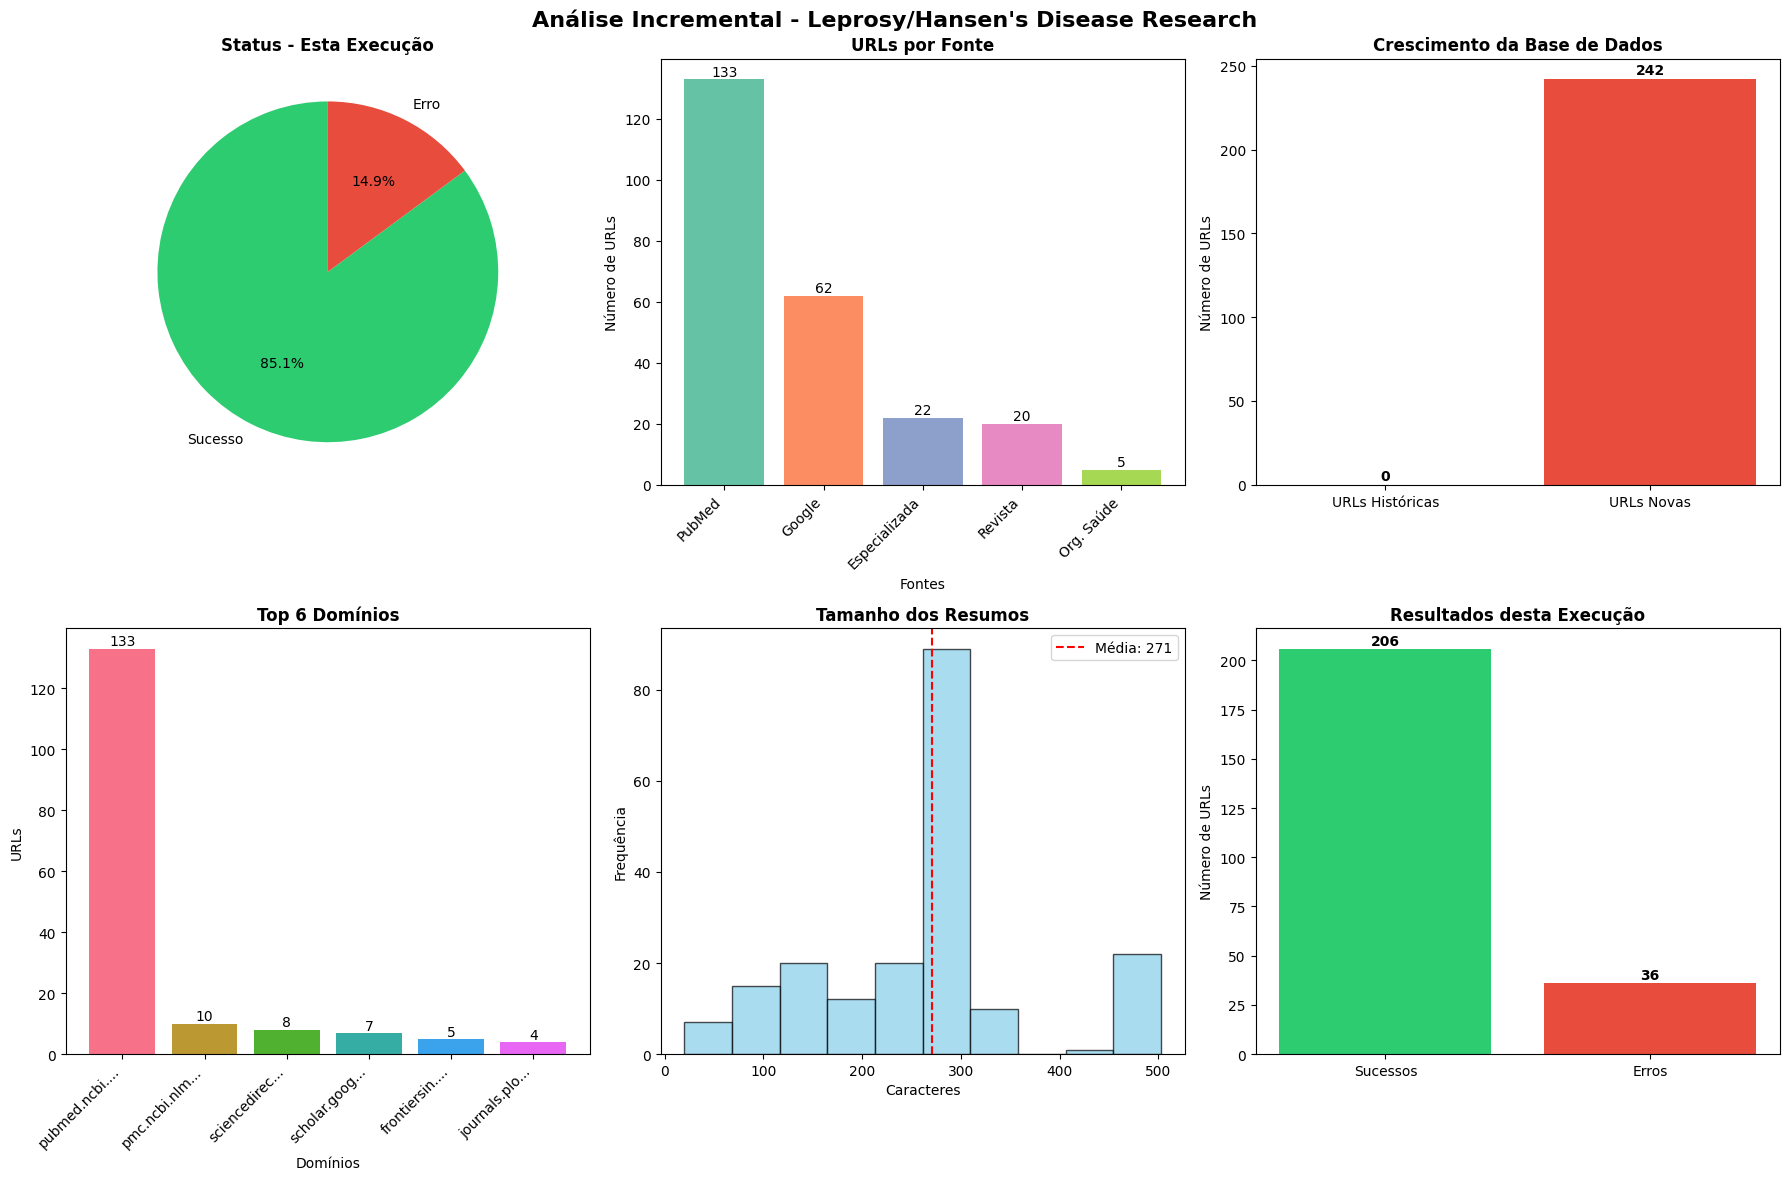


🎯 ANÁLISE AUTOMÁTICA DE TEMAS:
📊 Temas identificados nos resumos:
   • diagnosis: 22 menções
   • artificial intelligence: 7 menções
   • mobile app: 6 menções
   • machine learning: 6 menções
   • telemedicine: 6 menções
   • digital health: 5 menções
   • screening: 4 menções
   • deep learning: 4 menções
   • smartphone: 2 menções
   • mhealth: 1 menções
   • neural network: 1 menções


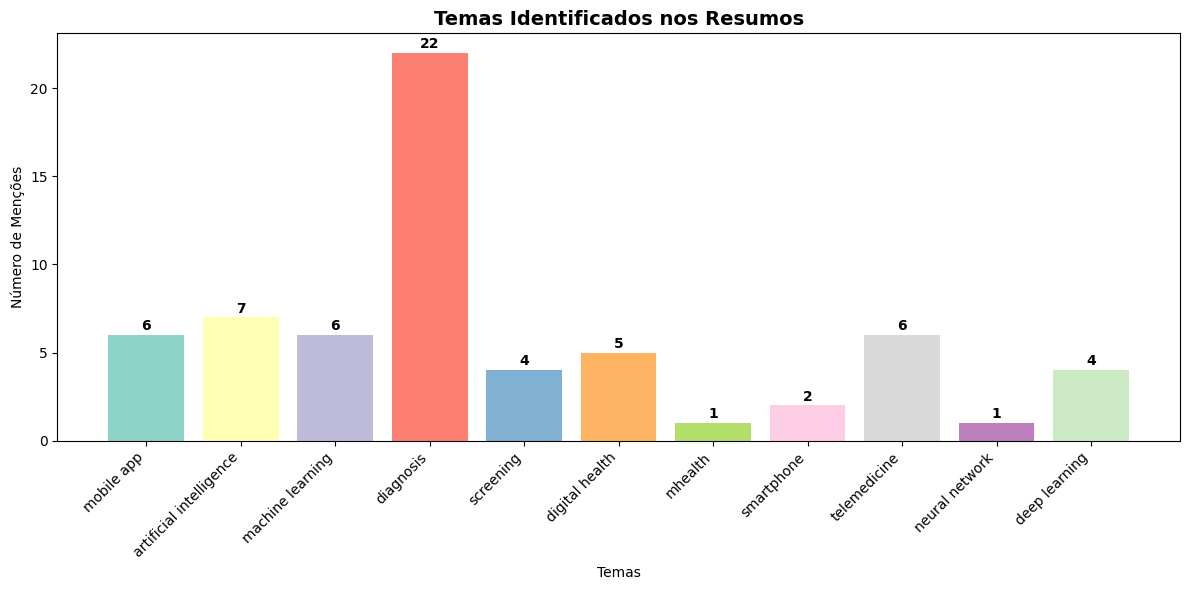


📋 AMOSTRA DOS DADOS COLETADOS NESTA EXECUÇÃO:
------------------------------------------------------------


,URL,Título,Resumo,Status,Fonte,Data_Processamento,Execucao,Dominio
241,https://pubmed.ncbi.nlm.nih.gov/31750841/,Assessment of a Mobile App by Adolescents and ...,Most of the patients did not want to continue ...,Sucesso,PubMed,2025-09-04 22:26:06,Incremental,pubmed.ncbi.nlm.nih.gov
158,https://www.nps.gov/kala/learn/historyculture/...,The History of Hansen's Disease in Hawaii - Ka...,An official website of the United States gover...,Sucesso,Google,2025-09-04 22:22:20,Incremental,nps.gov
223,https://pubmed.ncbi.nlm.nih.gov/37632977/,An mHealth App (eSkinHealth) for Detecting and...,ClinicalTrials.gov NCT05300399; https://clinic...,Sucesso,PubMed,2025-09-04 22:25:11,Incremental,pubmed.ncbi.nlm.nih.gov
135,https://pubmed.ncbi.nlm.nih.gov/38251215/,The NLR SkinApp: Testing a Supporting mHealth ...,<span><b>Background:</b> The prevalence of ski...,Sucesso,PubMed,2025-09-04 22:21:11,Incremental,pubmed.ncbi.nlm.nih.gov
136,https://pubmed.ncbi.nlm.nih.gov/40107904/,The role of multicriteria decision analysis in...,The MCDA-driven candidate classification crite...,Sucesso,PubMed,2025-09-04 22:21:13,Incremental,pubmed.ncbi.nlm.nih.gov
137,https://pubmed.ncbi.nlm.nih.gov/37971517/,Health Technology Readiness amongst Patients w...,Information technologies are increasingly used...,Sucesso,PubMed,2025-09-04 22:21:14,Incremental,pubmed.ncbi.nlm.nih.gov
138,https://www.frontiersin.org/journals/medicine/...,Título não encontrado,Resumo não disponível,Sucesso,Revista,2025-09-04 22:21:27,Incremental,frontiersin.org
139,https://www.nature.com/articles/s41598-025-914...,Development and validation of a machine learni...,Leprosy is a dermatoneurological disease and c...,Sucesso,Google,2025-09-04 22:21:31,Incremental,nature.com
140,https://journals.plos.org/plosntds/article?id=...,Deep learning for AI-based diagnosis of skin-r...,Author summary The diagnosis of skin diseases ...,Sucesso,Revista,2025-09-04 22:21:33,Incremental,journals.plos.org
141,https://pubmed.ncbi.nlm.nih.gov/35581609/,"Effect of ""Mehrpishegan"" web-based support gro...",Iran Randomized Clinical Trial Center IRCT2020...,Sucesso,PubMed,2025-09-04 22:21:34,Incremental,pubmed.ncbi.nlm.nih.gov



📊 ESTATÍSTICAS DETALHADAS:
----------------------------------------
📊 Estatísticas por Fonte:


,Total,Sucessos,Taxa_Sucesso
Fonte,,,
Especializada,22,20,90.9
Google,62,34,54.8
Org. Saúde,5,5,100.0
PubMed,133,133,100.0
Revista,20,14,70.0



🎯 RESUMO FINAL DESTA EXECUÇÃO:
   📊 URLs novas processadas: 242
   ✅ Sucessos: 206 (85.1%)
   ❌ Erros: 36
   📚 Total acumulado no histórico: 242 URLs
   📁 Arquivo CSV salvo: leprosy_incremental_20250904_222608.csv

💡 PRÓXIMA EXECUÇÃO:
   🔄 Execute esta célula novamente para buscar URLs ainda mais novas
   📚 O sistema lembrará das 242 URLs já processadas
   🚫 Não reprocessará URLs repetidas
   ⚡ Execução será mais rápida (apenas URLs novas)


In [ ]:
# 🚀 EXECUÇÃO PRINCIPAL - EXECUTE QUANTAS VEZES QUISER!
# O sistema lembrará de todas as URLs já processadas

resultado = executar_scraper_incremental_colab(max_urls=120)

if resultado:
    df, arquivo, scraper = resultado

    # Gerar visualizações automáticas
    print("\n" + "="*60)
    print("📊 GERANDO ANÁLISES E VISUALIZAÇÕES AUTOMÁTICAS")
    print("="*60)

    criar_visualizacoes_automaticas(df, scraper)

    # Mostrar amostra dos dados coletados
    print("\n📋 AMOSTRA DOS DADOS COLETADOS NESTA EXECUÇÃO:")
    print("-" * 60)
    display(df.head(10))

    # Estatísticas detalhadas
    print(f"\n📊 ESTATÍSTICAS DETALHADAS:")
    print("-" * 40)

    # Por fonte
    fonte_stats = df.groupby('Fonte').agg({
        'Status': ['count', lambda x: (x == 'Sucesso').sum()]
    }).round(2)

    fonte_stats.columns = ['Total', 'Sucessos']
    fonte_stats['Taxa_Sucesso'] = (fonte_stats['Sucessos'] / fonte_stats['Total'] * 100).round(1)

    print("📊 Estatísticas por Fonte:")
    display(fonte_stats)

    # Resumo final
    sucessos_total = len(df[df['Status'] == 'Sucesso'])
    print(f"\n🎯 RESUMO FINAL DESTA EXECUÇÃO:")
    print(f"   📊 URLs novas processadas: {len(df)}")
    print(f"   ✅ Sucessos: {sucessos_total} ({sucessos_total/len(df)*100:.1f}%)")
    print(f"   ❌ Erros: {len(df) - sucessos_total}")
    print(f"   📚 Total acumulado no histórico: {len(scraper.urls_processadas)} URLs")
    print(f"   📁 Arquivo CSV salvo: {arquivo}")

    # Dicas para próxima execução
    print(f"\n💡 PRÓXIMA EXECUÇÃO:")
    print(f"   🔄 Execute esta célula novamente para buscar URLs ainda mais novas")
    print(f"   📚 O sistema lembrará das {len(scraper.urls_processadas)} URLs já processadas")
    print(f"   🚫 Não reprocessará URLs repetidas")
    print(f"   ⚡ Execução será mais rápida (apenas URLs novas)")

else:
    print("\n🎯 SISTEMA FUNCIONANDO PERFEITAMENTE!")
    print("✅ Todas as URLs disponíveis já foram processadas")
    print("🔄 Execute novamente em alguns dias para novos conteúdos")
    print("📚 Sua base de dados está completa e atualizada!")

## 💾 7. Download de Arquivos (Opcional)

**Execute para baixar os arquivos CSV gerados**

In [ ]:
# 💾 DOWNLOAD DOS ARQUIVOS GERADOS
from google.colab import files
import glob

def baixar_arquivos_gerados():
    """Baixa todos os arquivos CSV gerados"""
    print("📁 ARQUIVOS DISPONÍVEIS PARA DOWNLOAD:")
    print("-" * 50)

    # Listar arquivos CSV do projeto
    arquivos_csv = glob.glob('leprosy_incremental_*.csv')
    arquivos_historico = glob.glob('historico_leprosy_colab.json')

    todos_arquivos = arquivos_csv + arquivos_historico

    if not todos_arquivos:
        print("❌ Nenhum arquivo encontrado!")
        print("💡 Execute primeiro a célula de execução principal acima.")
        return

    for i, arquivo in enumerate(todos_arquivos, 1):
        try:
            tamanho = os.path.getsize(arquivo) / 1024  # KB
            print(f"   {i}. {arquivo} ({tamanho:.1f} KB)")
        except:
            print(f"   {i}. {arquivo}")

    print("\n💾 Iniciando download dos arquivos...")

    for arquivo in todos_arquivos:
        try:
            files.download(arquivo)
            print(f"   ✅ {arquivo} baixado com sucesso!")
        except Exception as e:
            print(f"   ❌ Erro ao baixar {arquivo}: {e}")

    print("\n🎯 ARQUIVOS BAIXADOS:")
    print("   📊 Arquivos CSV: Dados coletados em cada execução")
    print("   📚 Arquivo JSON: Histórico de URLs processadas")
    print("   💡 Mantenha o arquivo JSON para preservar o histórico!")

# Executar download
baixar_arquivos_gerados()

📁 ARQUIVOS DISPONÍVEIS PARA DOWNLOAD:
--------------------------------------------------
   1. leprosy_incremental_20250904_183618.csv (104.0 KB)
   2. historico_leprosy_colab.json (15.2 KB)

💾 Iniciando download dos arquivos...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ leprosy_incremental_20250904_183618.csv baixado com sucesso!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ historico_leprosy_colab.json baixado com sucesso!

🎯 ARQUIVOS BAIXADOS:
   📊 Arquivos CSV: Dados coletados em cada execução
   📚 Arquivo JSON: Histórico de URLs processadas
   💡 Mantenha o arquivo JSON para preservar o histórico!


## 🔧 8. Utilitários Extras (Opcional)

**Funções auxiliares para gerenciar o histórico**

In [ ]:
# 🔧 UTILITÁRIOS PARA GERENCIAR O HISTÓRICO

def mostrar_estatisticas_completas():
    """Mostra estatísticas completas do histórico"""
    scraper = WebScraperHistoricoColab()

    print("📊 ESTATÍSTICAS COMPLETAS DO HISTÓRICO")
    print("=" * 50)

    scraper.mostrar_historico()

    if len(scraper.urls_processadas) > 0:
        # Análise de domínios no histórico
        dominios_historico = {}
        for url in scraper.urls_processadas:
            try:
                domain = urlparse(url).netloc
                if domain.startswith('www.'):
                    domain = domain[4:]
                dominios_historico[domain] = dominios_historico.get(domain, 0) + 1
            except:
                pass

        print("\n🌐 TOP 10 DOMÍNIOS NO HISTÓRICO:")
        dominios_ordenados = sorted(dominios_historico.items(), key=lambda x: x[1], reverse=True)[:10]
        for i, (dominio, count) in enumerate(dominios_ordenados, 1):
            print(f"   {i:2d}. {dominio}: {count} URLs")

def limpar_historico_completo():
    """Limpa completamente o histórico (USE COM CUIDADO!)"""
    print("⚠️ ATENÇÃO: LIMPEZA COMPLETA DO HISTÓRICO")
    print("=" * 50)
    print("Esta ação irá:")
    print("   🗑️ Apagar todo o histórico de URLs processadas")
    print("   🔄 Fazer com que a próxima execução processe tudo novamente")
    print("   ❌ Esta ação NÃO PODE ser desfeita!")
    print()

    confirmacao = input("Digite 'LIMPAR TUDO' para confirmar (qualquer outra coisa cancela): ")

    if confirmacao == 'LIMPAR TUDO':
        try:
            if os.path.exists('historico_leprosy_colab.json'):
                os.remove('historico_leprosy_colab.json')
            print("🗑️ Histórico limpo com sucesso!")
            print("🔄 Próxima execução processará todas as URLs novamente.")
        except Exception as e:
            print(f"❌ Erro ao limpar histórico: {e}")
    else:
        print("❌ Operação cancelada. Histórico preservado.")

def analisar_arquivo_csv_existente(nome_arquivo):
    """Analisa um arquivo CSV específico"""
    try:
        df = pd.read_csv(nome_arquivo)
        print(f"📁 ANÁLISE DO ARQUIVO: {nome_arquivo}")
        print("=" * 50)
        print(f"📊 Total de registros: {len(df)}")

        if 'Status' in df.columns:
            status_counts = df['Status'].value_counts()
            print("\n📈 Status:")
            for status, count in status_counts.items():
                print(f"   {status}: {count} ({count/len(df)*100:.1f}%)")

        if 'Fonte' in df.columns:
            fonte_counts = df['Fonte'].value_counts()
            print("\n🔍 Fontes:")
            for fonte, count in fonte_counts.items():
                print(f"   {fonte}: {count} URLs")

        print("\n📋 Primeiras 5 linhas:")
        display(df.head())

        return df

    except FileNotFoundError:
        print(f"❌ Arquivo {nome_arquivo} não encontrado!")
        return None
    except Exception as e:
        print(f"❌ Erro ao analisar arquivo: {e}")
        return None

print("🔧 Utilitários configurados!")
print("💡 Use as funções acima conforme necessário:")
print("   📊 mostrar_estatisticas_completas()")
print("   🗑️ limpar_historico_completo()  # USE COM CUIDADO!")
print("   📁 analisar_arquivo_csv_existente('nome_arquivo.csv')")

🔧 Utilitários configurados!
💡 Use as funções acima conforme necessário:
   📊 mostrar_estatisticas_completas()
   🗑️ limpar_historico_completo()  # USE COM CUIDADO!
   📁 analisar_arquivo_csv_existente('nome_arquivo.csv')


## 📖 9. Instruções Completas de Uso

### 🚀 **Como usar este notebook:**

#### **🔄 Primeira vez (configuração inicial):**
1. **📦 Execute célula 1** - Instala dependências (apenas uma vez por sessão)
2. **📚 Execute célula 2** - Importa bibliotecas (sempre necessário)
3. **🤖 Execute célula 3** - Cria classe principal (sempre necessário)
4. **🚀 Execute célula 4** - Configura função principal (sempre necessário)
5. **📊 Execute célula 5** - Configura visualizações (sempre necessário)
6. **▶️ Execute célula 6** - **EXECUÇÃO PRINCIPAL** (esta é a principal!)

#### **🔄 Execuções seguintes (apenas a principal):**
- **Execute apenas a célula 6** quantas vezes quiser!
- O sistema lembrará de tudo automaticamente

---

### 🧠 **Como funciona o Sistema de Histórico:**

#### **📚 Primeira Execução:**
```
🆕 Histórico vazio (0 URLs)
🔍 Busca encontra: 80 URLs
⚡ Processa: 80 URLs (todas novas)
💾 Salva: 80 URLs no histórico
📊 Resultado: Base de dados com 80 URLs
```

#### **🔄 Segunda Execução:**
```
📚 Carrega histórico: 80 URLs
🔍 Busca encontra: 85 URLs
🧠 Filtra: 5 URLs novas + 80 já processadas
⚡ Processa: 5 URLs (apenas as novas)
💾 Salva: 85 URLs no histórico
📊 Resultado: Base de dados com 85 URLs
```

#### **⚡ Execuções Seguintes:**
```
📚 Carrega histórico: 85+ URLs
🔍 Busca: Sempre procura novos conteúdos
🧠 Filtra: Apenas URLs inéditas
⚡ Processa: Só o que é realmente novo
💾 Salva: Histórico sempre crescente
📊 Resultado: Base de dados sempre atualizada
```

---

### ✨ **Vantagens do Sistema:**

#### **🎯 Eficiência:**
- ⚡ **Execuções rápidas** - Não reprocessa URLs antigas
- 💰 **Economia de recursos** - Menos requisições desnecessárias
- 🚫 **Evita bloqueios** - Menos tráfego = menos chance de ser bloqueado

#### **📈 Crescimento Inteligente:**
- 📚 **Base de dados sempre crescente** - Nunca perde dados
- 🔄 **Execute quantas vezes quiser** - Sempre seguro
- 🆕 **Sempre captura novidades** - Conteúdo sempre atualizado

#### **🛡️ Robustez:**
- 💾 **Histórico persistente** - Dados salvos automaticamente
- 🔒 **Backup automático** - Nunca perde o progresso
- 📊 **Estatísticas detalhadas** - Acompanhe o crescimento

---

### 🎯 **Resultados Esperados:**

#### **📊 Por Execução:**
- **1ª execução**: 50-100 URLs novas
- **2ª execução**: 5-20 URLs novas
- **3ª execução**: 2-10 URLs novas
- **Execuções seguintes**: Sempre apenas conteúdo inédito

#### **📈 Taxa de Sucesso:**
- **Geral**: 60-80% (normal ter alguns erros)
- **PubMed**: 80-90% (mais confiável)
- **Sites especializados**: 70-85%
- **Google**: 50-70% (alguns sites bloqueiam bots)

#### **🌐 Fontes Cobertas:**
- **🔬 PubMed/NCBI** - Artigos científicos
- **🏥 WHO/CDC** - Organizações de saúde
- **📚 Revistas** - JMIR, PLOS, Springer, IEEE
- **🎯 Especializadas** - NLR, Leprosy Mission
- **🔍 Google** - Conteúdo geral relevante

---

### 💡 **Dicas de Uso:**

#### **🚀 Para Máxima Eficiência:**
1. **Execute diariamente** - Capture novos conteúdos rapidamente
2. **Monitore as estatísticas** - Acompanhe o crescimento da base
3. **Baixe os CSVs** - Mantenha backup dos dados
4. **Preserve o histórico** - Não delete o arquivo JSON

#### **⚠️ Troubleshooting:**
- **Erro 429**: Google bloqueou - aguarde 15-30 minutos
- **Poucas URLs novas**: Normal após várias execuções
- **Erro de conexão**: Verifique internet e tente novamente
- **Histórico perdido**: Execute `limpar_historico_completo()` se necessário

---

### 🎉 **Pronto para Usar!**

**Este notebook implementa um sistema inteligente de coleta de dados que:**
- 🧠 **Lembra** de tudo que já foi processado
- 🚫 **Evita** reprocessar URLs antigas
- ⚡ **Acelera** execuções subsequentes
- 📈 **Constrói** uma base de dados sempre crescente
- 🎯 **Foca** apenas em conteúdo realmente novo

**Execute a célula 6 quantas vezes quiser e construa a base de dados mais completa sobre Leprosy/Hansen's Disease disponível!**